<a href="https://colab.research.google.com/github/mazg-95/text-mining-image-processing/blob/main/HT2_21000546.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HT 2
## Text Mining and Image Recognition
#### Marco Antonio Zuñiga Guzman
#### Carne: 21000546

In [107]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#### Problema #1

Desarrolle una funcion que permita hacer la binarizacion de una imagen, para realizarlo puede utilizar el enfoque que prefiera. Recuerde que al binarizar una imagen esta solo puede contener los valores 0 (negro) y 255 (blanco).

In [108]:
def binarize_image(image, umbral):
  return image > umbral

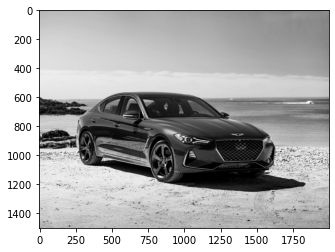

In [109]:
img_str = "/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/HT2/car.jpg"
img = cv2.imread(img_str)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

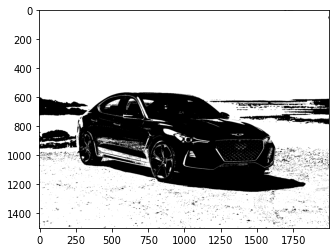

In [110]:
bin_image = binarize_image(gray, 127)

plt.imshow(bin_image, cmap="gray")

### Problema 2

Operaciones SUMA, Resta, AND, OR, XOR.

In [111]:
def sum_images(img1, img2):
  return np.minimum(img1 + img2, 255)

def substract_images(img1, img2):
  return np.maximum(img1 - img2, 0)

def and_imgs(img1, img2):
  return img1 & img2

def or_imgs(img1, img2):
  return img1 | img2

def xor_imgs(img1, img2):
  return np.logical_xor(img1, img2)

In [112]:
img_str = "/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/HT2/pelota.jpg"
pelota = cv2.imread(img_str)
pelota = cv2.cvtColor(pelota, cv2.COLOR_RGB2BGR)
img_str = "/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/HT2/playa.jpg"
playa = cv2.imread(img_str)
playa = cv2.cvtColor(playa, cv2.COLOR_RGB2BGR)
dim = (pelota.shape[1], pelota.shape[0])
playa = cv2.resize(playa, dim)

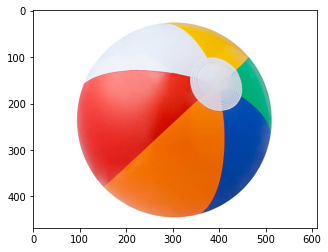

In [113]:
plt.imshow(pelota)

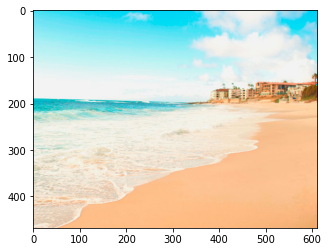

In [114]:
plt.imshow(playa)

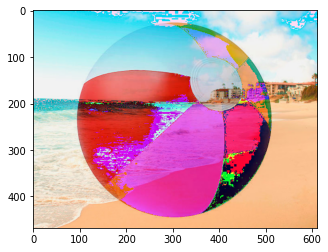

In [115]:
sum_res = sum_images(playa, pelota)
plt.imshow(sum_res)

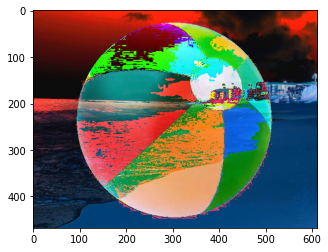

In [116]:
sub_res = substract_images(pelota, playa)
plt.imshow(sub_res)

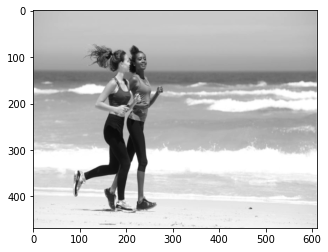

In [117]:
img_str = "/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/HT2/runners.JPG"
runners = cv2.imread(img_str)
runners = cv2.cvtColor(runners, cv2.COLOR_BGR2GRAY)
dim = (playa.shape[1], playa.shape[0])
runners = cv2.resize(runners, dim)
plt.imshow(runners, cmap="gray")

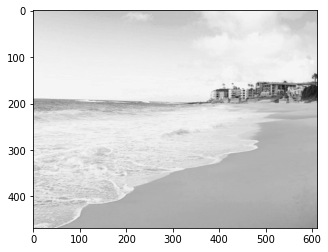

In [118]:
playa = cv2.cvtColor(playa, cv2.COLOR_BGR2GRAY)
plt.imshow(playa, cmap="gray")

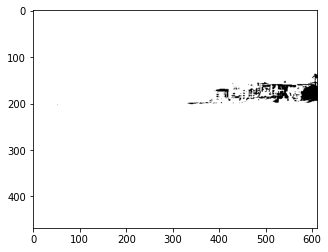

In [119]:
runners = binarize_image(runners, 127)
playa = binarize_image(playa, 127)
plt.imshow(playa, cmap="gray")

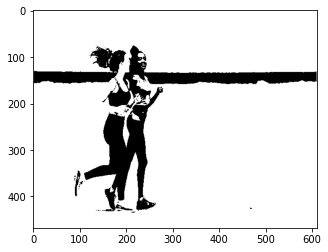

In [120]:
plt.imshow(runners, cmap="gray")

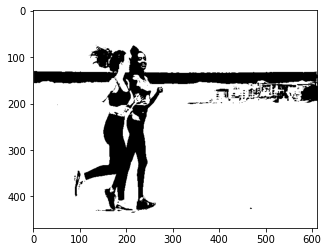

In [121]:
and_res = and_imgs(runners, playa)

plt.imshow(and_res, cmap="gray")

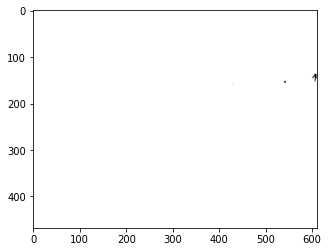

In [122]:
or_res = or_imgs(runners, playa)
plt.imshow(or_res, cmap="gray")

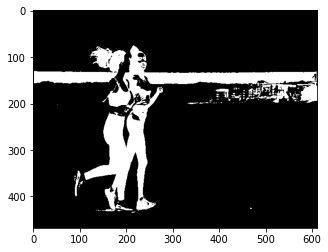

In [123]:
xor_res = xor_imgs(runners, playa)
plt.imshow(xor_res, cmap="gray")

### Problema 3


In [124]:
def grayscale2_3d(gray):
  xx, yy = np.mgrid[0:gray.shape[0], 0:gray.shape[1]]
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.plot_surface(xx, yy, gray, cmap="gray")
  plt.show()

(1500, 1994)
(1500, 1994)
(1500, 1994)


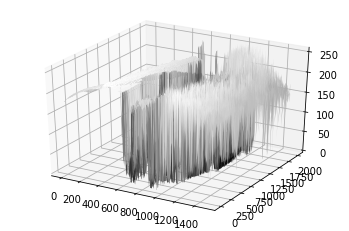

In [125]:
grayscale2_3d(gray)

### Problema 4

Tranformaciones: Negativa, Lineal, Logaritmica, Exponencial

In [128]:
def transform_image(img, t=1, alpha=1, beta=0, gamma=0):
  if t == 1:
    return 255 - img
  elif t == 2:
    return np.minimum(np.maximum(alpha * img + beta, 0), 255)
  elif t == 3:
    return alpha * np.log(1 + img)
  elif t == 4: 
    img = img / 255
    return alpha * (np.power(img, gamma))

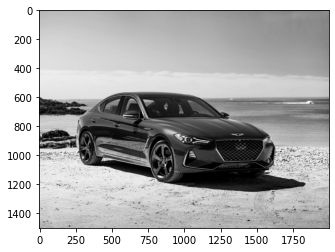

In [127]:
plt.imshow(gray, cmap="gray")

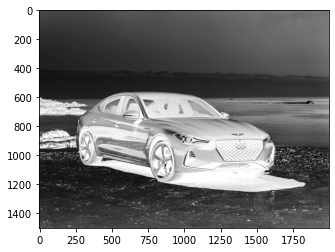

In [129]:
plt.imshow(transform_image(gray), cmap="gray")

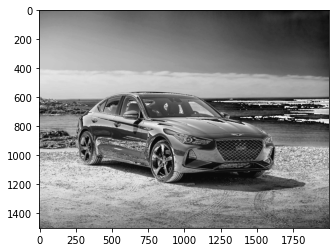

In [134]:
plt.imshow(transform_image(gray, t=2, alpha=2, beta=10), cmap="gray")

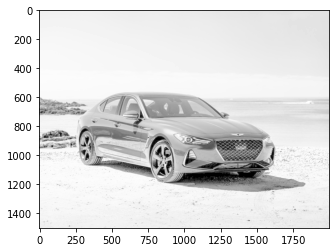

In [162]:
gray = gray.astype(int)
log_img = transform_image(gray, t=3, alpha=2)
plt.imshow(log_img / 255, cmap="gray")

[[177 177 177 ... 134 133 133]
 [177 177 177 ... 134 133 133]
 [177 177 177 ... 134 133 133]
 ...
 [162 156 152 ... 148 149 147]
 [165 159 154 ... 147 146 145]
 [172 166 160 ... 149 147 146]]


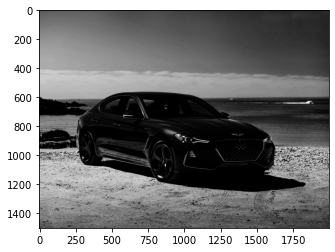

In [163]:
plt.imshow(transform_image(gray, t=4, alpha=2, gamma=3), cmap="gray")

### Problema 5

Matrices de Convolucion

In [204]:
def convolute_img(img, kernel=None):
  if kernel is None:
    return img
  im_r, im_c = img.shape[0:2]
  kl = kernel.shape[0]
  kc = (kl-1)/2 # kernel center
  res = img * 0
  for i in range(im_r):
    for j in range(im_c):
      acc = 0
      for ki in range(kl):
        for kj in range(kl):
          if 0 <= i - kc + ki < im_r and 0 <= j - kc + kj < im_c:
            index = (int(i-kc+ki), int(j-kc+kj))
            acc = acc + (img[index] * kernel[ki, kj])
      res[i,j] = acc
  return res

In [176]:
def convolute_and_plot(img, kernel=None):
  fig, axs = plt.subplots(2, sharey=True, tight_layout=True)
  imgc = convolute_img(img, kernel=kernel)
  axs[0].imshow(img)
  axs[1].imshow(imgc)
  plt.show()

  # Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])


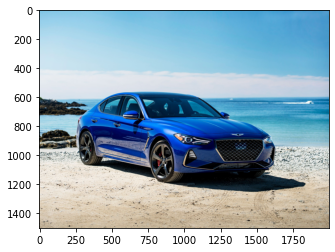

In [208]:
img_str = "/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/HT2/car.jpg"
img = cv2.imread(img_str)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = img.astype(int)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


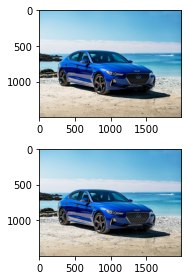

In [209]:
convolute_and_plot(img, kernel=sharpen)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


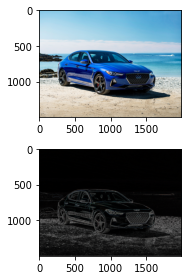

In [211]:

  # edge
edge = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
convolute_and_plot(img, kernel=edge)